In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
# Load the dataset (Replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/final_df_dataset.csv')

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                            CT Image  \
0  /content/drive/MyDrive/MiniProject/MiniProject...   
1  /content/drive/MyDrive/MiniProject/MiniProject...   
2  /content/drive/MyDrive/MiniProject/MiniProject...   
3  /content/drive/MyDrive/MiniProject/MiniProject...   
4  /content/drive/MyDrive/MiniProject/MiniProject...   

                                            MR Image  
0  /content/drive/MyDrive/MiniProject/MiniProject...  
1  /content/drive/MyDrive/MiniProject/MiniProject...  
2  /content/drive/MyDrive/MiniProject/MiniProject...  
3  /content/drive/MyDrive/MiniProject/MiniProject...  
4  /content/drive/MyDrive/MiniProject/MiniProject...  


In [ ]:
# 2. Checking the shape of the dataset
print(f"\nShape of the dataset: {df.shape}")


Shape of the dataset: (2636, 2)


In [ ]:
# Display the columns and their types
print(f"\nColumns and their data types:\n{df.dtypes}")


Columns and their data types:
CT Image    object
MR Image    object
dtype: object


In [ ]:
# Checking for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
CT Image    0
MR Image    0
dtype: int64


In [ ]:
# Descriptive statistics of numerical columns
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                                                 CT Image  \
count                                                2636   
unique                                               2636   
top     /content/drive/MyDrive/MiniProject/MiniProject...   
freq                                                    1   

                                                 MR Image  
count                                                2636  
unique                                               2636  
top     /content/drive/MyDrive/MiniProject/MiniProject...  
freq                                                    1  


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.1 MB/s eta 0:00:00


#**1. U-Net Model Code**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def unet_model(input_shape=(256, 256, 1)):
    inputs = layers.Input(shape=input_shape)

    # Downsampling path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Upsampling path
    u5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the UNet model
unet = unet_model(input_shape=(256, 256, 1))
unet.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 64, 64, 256)    │        524,544 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 512)    │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 256)    │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 128, 128, 128)  │        131,200 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 7,696,193 (29.36 MB)

 Trainable params: 7,696,193 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Define paths to your dataset
ct_image_dir = df['CT Image']
mr_image_dir = df['MR Image']

# Get lists of image file names
ct_images = [os.path.join(ct_image_dir, f) for f in os.listdir(ct_image_dir) if f.endswith('.png')]
mr_images = [os.path.join(mr_image_dir, f) for f in os.listdir(mr_image_dir) if f.endswith('.jpg')]

# Function to load and preprocess images
def load_and_preprocess_images(ct_paths, mr_paths):
    X = []
    Y = []

    for ct_path, mr_path in zip(ct_paths, mr_paths):
        # Load CT image
        ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
        ct_image = cv2.resize(ct_image, (256, 256))  # Resize to match model input
        X.append(ct_image)

        # Load MRI image
        mr_image = cv2.imread(mr_path, cv2.IMREAD_GRAYSCALE)
        mr_image = cv2.resize(mr_image, (256, 256))  # Resize to match model input
        Y.append(mr_image)

    X = np.array(X).reshape(-1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    Y = np.array(Y).reshape(-1, 256, 256, 1) / 255.0  # Normalize and add channel dimension

    return X, Y

# Load images
X, Y = load_and_preprocess_images(ct_images, mr_images)

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf

# Convert the data into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

# Shuffle, batch, and prefetch the datasets for batch processing
batch_size = 8
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
# Train the model using the dataset with batch processing
history = unet.fit(train_dataset,
                   validation_data=val_dataset,
                   epochs=10)
# Save the entire model to a file
unet.save('/content/drive/MyDrive/MiniProject/MiniProject/Models/unet_model.h5')

# Evaluate the model on validation data
val_loss, val_accuracy = unet.evaluate(X_val, Y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths to your dataset
ct_image_dir = df['CT Image']
mr_image_dir = df['MR Image']

# Get lists of image file names
ct_images = [os.path.join(ct_image_dir, f) for f in os.listdir(ct_image_dir) if f.endswith('.png')]
mr_images = [os.path.join(mr_image_dir, f) for f in os.listdir(mr_image_dir) if f.endswith('.jpg')]

# Function to load and preprocess images
def load_and_preprocess_images(ct_paths, mr_paths):
    X = []
    Y = []
    for ct_path, mr_path in zip(ct_paths, mr_paths):
        # Load CT image
        ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
        ct_image = cv2.resize(ct_image, (256, 256))  # Resize to match model input
        X.append(ct_image)

        # Load MRI image
        mr_image = cv2.imread(mr_path, cv2.IMREAD_GRAYSCALE)
        mr_image = cv2.resize(mr_image, (256, 256))  # Resize to match model input
        Y.append(mr_image)

    X = np.array(X).reshape(-1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    Y = np.array(Y).reshape(-1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    return X, Y

# Load and preprocess images
X, Y = load_and_preprocess_images(ct_images, mr_images)

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert the data into TensorFlow datasets for batch processing
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Define and create the Attention UNet model
attention_unet = attention_unet_model(input_shape=(256, 256, 1))

# Train the Attention UNet model
history = attention_unet.fit(train_dataset,
                             validation_data=val_dataset,
                             epochs=50)

# Save the trained model
attention_unet.save('/content/drive/MyDrive/MiniProject/MiniProject/Models/attention_unet_model.h5')

# Evaluate the model on the validation set
val_loss, val_accuracy = attention_unet.evaluate(val_dataset)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


In [ ]:
import numpy as np
import cv2
import os
import tensorflow as tf

# Define the path to the saved UNet model
unet_model_path = '/content/drive/MyDrive/MiniProject/MiniProject/Models/unet_model.h5'

# Load the trained UNet model
unet_model = tf.keras.models.load_model(unet_model_path)

# Function to preprocess a single image (MRI image for prediction)
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (256, 256))  # Resize to match model input
    image = np.array(image).reshape(1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    return image

# Function to make a prediction on a new MRI image
def predict_ct_image(mri_image_path):
    # Preprocess the input MRI image
    input_image = preprocess_image(mri_image_path)

    # Use the UNet model to predict the corresponding CT image
    predicted_ct = unet_model.predict(input_image)

    # Post-process the output (rescale back to [0, 255] and remove channel dimension)
    predicted_ct = (predicted_ct[0, :, :, 0] * 255.0).astype(np.uint8)

    return predicted_ct

# Define path to a new MRI image for prediction
new_mri_image_path = '/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/testB/mri100.jpg'

# Predict the corresponding CT image
predicted_ct_image = predict_ct_image(new_mri_image_path)

# Save the predicted CT image
output_path = '/content/drive/MyDrive/MiniProject/MiniProject/predicted_ct_image1.png'
cv2.imwrite(output_path, predicted_ct_image)

print(f'Predicted CT image saved at: {output_path}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted CT image saved at: /content/drive/MyDrive/MiniProject/MiniProject/predicted_ct_image1.png


In [ ]:
import numpy as np
import cv2
import os
import tensorflow as tf

# Define the path to the saved UNet model
unet_model_path = '/content/drive/MyDrive/MiniProject/MiniProject/Models/unet_model.h5'

# Load the trained UNet model
unet_model = tf.keras.models.load_model(unet_model_path)

# Function to preprocess a single image (MRI image for prediction)
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (256, 256))  # Resize to match model input
    image = np.array(image).reshape(1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    return image

# Function to make a prediction on a new MRI image
def predict_ct_image(mri_image_path):
    # Preprocess the input MRI image
    input_image = preprocess_image(mri_image_path)

    # Use the UNet model to predict the corresponding CT image
    predicted_ct = unet_model.predict(input_image)

    # Post-process the output (rescale back to [0, 255] and remove channel dimension)
    predicted_ct = (predicted_ct[0, :, :, 0] * 255.0).astype(np.uint8)

    return predicted_ct

# Define path to a new MRI image for prediction
new_mri_image_path = '/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/testB/mri1000.jpg'

# Predict the corresponding CT image
predicted_ct_image = predict_ct_image(new_mri_image_path)

# Save the predicted CT image
output_path = '/content/drive/MyDrive/MiniProject/MiniProject/predicted_ct_image3.png'
cv2.imwrite(output_path, predicted_ct_image)

print(f'Predicted CT image saved at: {output_path}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted CT image saved at: /content/drive/MyDrive/MiniProject/MiniProject/predicted_ct_image3.png


#**2. Attention U-Net Model Code**

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
# Load the dataset (Replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/final_df_dataset.csv')

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import Sequence

# Define paths to your dataset
ct_image_dir = df['CT Image']
mr_image_dir = df['MR Image']

# Get lists of image file names
ct_images = [os.path.join(ct_image_dir, f) for f in os.listdir(ct_image_dir) if f.endswith('.png')]
mr_images = [os.path.join(mr_image_dir, f) for f in os.listdir(mr_image_dir) if f.endswith('.jpg')]

# Create a custom data generator class
class ImageDataGenerator(Sequence):
    def __init__(self, ct_paths, mr_paths, batch_size=16, img_size=(256, 256)):
        self.ct_paths = ct_paths
        self.mr_paths = mr_paths
        self.batch_size = batch_size
        self.img_size = img_size
        self.indices = np.arange(len(self.ct_paths))

    def __len__(self):
        return int(np.ceil(len(self.ct_paths) / self.batch_size))

    def __getitem__(self, index):
        # Get batch indices
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Load and preprocess a batch of images
        ct_batch = []
        mr_batch = []
        for i in batch_indices:
            # Load CT and MRI images
            ct_image = cv2.imread(self.ct_paths[i], cv2.IMREAD_GRAYSCALE)
            mr_image = cv2.imread(self.mr_paths[i], cv2.IMREAD_GRAYSCALE)

            # Resize images
            ct_image = cv2.resize(ct_image, self.img_size)
            mr_image = cv2.resize(mr_image, self.img_size)

            # Normalize and expand dimensions
            ct_batch.append(ct_image.reshape(self.img_size + (1,)) / 255.0)
            mr_batch.append(mr_image.reshape(self.img_size + (1,)) / 255.0)

        return np.array(ct_batch), np.array(mr_batch)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Create train and validation generators
batch_size = 16  # Adjust batch size to fit your RAM
train_generator = ImageDataGenerator(ct_images, mr_images, batch_size=batch_size)

# Example for validation generator
# validation_generator = ImageDataGenerator(validation_ct_images, validation_mr_images, batch_size=batch_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class AttentionUNet:
    def __init__(self, img_rows=256, img_cols=256):  # Change from 512 to 256
        self.img_rows = img_rows
        self.img_cols = img_cols
        self.img_shape = (self.img_rows, self.img_cols, 1)
        self.df = 64  # Downsampling filter size
        self.uf = 64  # Upsampling filter size


    def build_unet(self):
        # Convolution block with optional batch normalization and dropout
        def conv2d(layer_input, filters, dropout_rate=0, bn=False):
            d = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(layer_input)
            if bn:
                d = layers.BatchNormalization()(d)
            d = layers.Activation('relu')(d)

            d = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(d)
            if bn:
                d = layers.BatchNormalization()(d)
            d = layers.Activation('relu')(d)

            if dropout_rate:
                d = layers.Dropout(dropout_rate)(d)

            return d

        # Deconvolution block with optional batch normalization
        def deconv2d(layer_input, filters, bn=False):
            u = layers.UpSampling2D((2, 2))(layer_input)
            u = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(u)
            if bn:
                u = layers.BatchNormalization()(u)
            u = layers.Activation('relu')(u)

            return u

        # Attention block
        def attention_block(F_g, F_l, F_int, bn=False):
            g = layers.Conv2D(F_int, kernel_size=(1, 1), strides=(1, 1), padding='valid')(F_g)
            if bn:
                g = layers.BatchNormalization()(g)
            x = layers.Conv2D(F_int, kernel_size=(1, 1), strides=(1, 1), padding='valid')(F_l)
            if bn:
                x = layers.BatchNormalization()(x)

            psi = layers.Add()([g, x])
            psi = layers.Activation('relu')(psi)

            psi = layers.Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(psi)
            if bn:
                psi = layers.BatchNormalization()(psi)
            psi = layers.Activation('sigmoid')(psi)

            return layers.Multiply()([F_l, psi])

        inputs = layers.Input(shape=self.img_shape)

        # Contracting path (encoder)
        conv1 = conv2d(inputs, self.df)
        pool1 = layers.MaxPooling2D((2, 2))(conv1)

        conv2 = conv2d(pool1, self.df * 2, bn=True)
        pool2 = layers.MaxPooling2D((2, 2))(conv2)

        conv3 = conv2d(pool2, self.df * 4, bn=True)
        pool3 = layers.MaxPooling2D((2, 2))(conv3)

        conv4 = conv2d(pool3, self.df * 8, dropout_rate=0.5, bn=True)
        pool4 = layers.MaxPooling2D((2, 2))(conv4)

        conv5 = conv2d(pool4, self.df * 16, dropout_rate=0.5, bn=True)

        # Expanding path (decoder)
        up6 = deconv2d(conv5, self.uf * 8, bn=True)
        conv6 = attention_block(up6, conv4, self.uf * 8, bn=True)
        up6 = layers.Concatenate()([up6, conv6])
        conv6 = conv2d(up6, self.uf * 8)

        up7 = deconv2d(conv6, self.uf * 4, bn=True)
        conv7 = attention_block(up7, conv3, self.uf * 4, bn=True)
        up7 = layers.Concatenate()([up7, conv7])
        conv7 = conv2d(up7, self.uf * 4)

        up8 = deconv2d(conv7, self.uf * 2, bn=True)
        conv8 = attention_block(up8, conv2, self.uf * 2, bn=True)
        up8 = layers.Concatenate()([up8, conv8])
        conv8 = conv2d(up8, self.uf * 2)

        up9 = deconv2d(conv8, self.uf, bn=True)
        conv9 = attention_block(up9, conv1, self.uf, bn=True)
        up9 = layers.Concatenate()([up9, conv9])
        conv9 = conv2d(up9, self.uf)

        # Output layer
        outputs = layers.Conv2D(1, kernel_size=(1, 1), strides=(1, 1), activation='sigmoid')(conv9)

        # Model creation
        model = Model(inputs=inputs, outputs=outputs)

        return model

# Instantiate and build the Attention UNet model
a = AttentionUNet()
unet = a.build_unet()
unet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 64, 64, 256)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ activation_4[0][0]     │
├──────────────────────

 Total params: 35,238,293 (134.42 MB)

 Trainable params: 35,224,845 (134.37 MB)

 Non-trainable params: 13,448 (52.53 KB)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 831s 6s/step - accuracy: 0.1721 - loss: 0.0508 - val_accuracy: 0.1908 - val_loss: 0.0637
Epoch 2/8


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1831 - val_loss: 0.0621
Epoch 3/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.1825 - loss: 0.0393 - val_accuracy: 0.1803 - val_loss: 0.0443
Epoch 4/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1858 - val_loss: 0.0417
Epoch 5/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1844 - loss: 0.0392 - val_accuracy: 0.1782 - val_loss: 0.0410
Epoch 6/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1915 - val_loss: 0.0406
Epoch 7/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.1783 - loss: 0.0389 - val_accuracy: 0.1771 - val_loss: 0.0451
Epoch 8/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1726 - val_loss: 0.0429


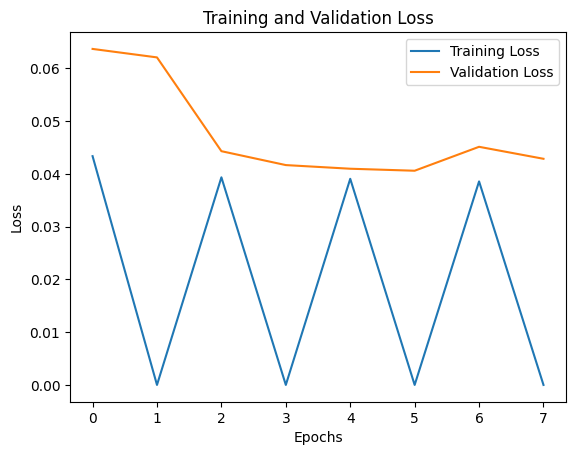

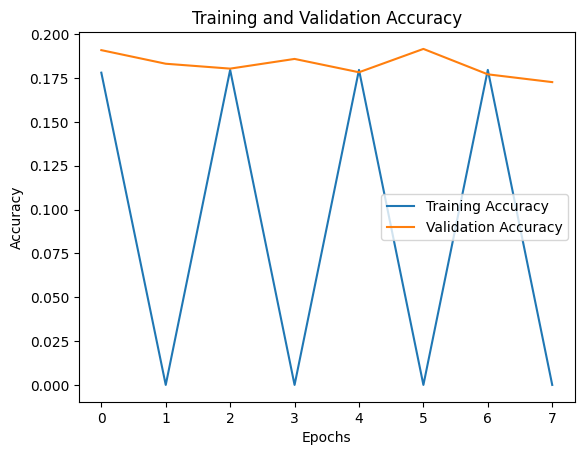

In [ ]:
# Compile the model
unet.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model using the generator
history = unet.fit(
    train_generator,
    epochs=8,
    steps_per_epoch=len(train_generator),
    validation_data=train_generator,  # Use validation generator as well
    validation_steps=len(train_generator) // 5  # Assuming 20% for validation
)


# Save the model after training
unet.save('/content/drive/MyDrive/MiniProject/attention_unet_model.h5')

# Optionally, plot training history
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import shutil

# Path to the Attention U-Net model file
source_path = '/content/drive/MyDrive/MiniProject/attention_unet_model.h5'
# Destination path
destination_path = '/content/drive/MyDrive/Mini Project/attention_unet_model.h5'

# Copy the file from the source to the destination
shutil.copy(source_path, destination_path)

# Verify that the file has been copied successfully
file_exists = os.path.exists(destination_path)
file_exists


In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Load the saved Attention U-Net model
model = tf.keras.models.load_model('/content/drive/MyDrive/MiniProject/attention_unet_model.h5')

# Function to load and preprocess an MRI image
def preprocess_image(image_path):
    # Load the MRI image in grayscale
    mri_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if mri_image is None:
        raise ValueError(f"Error: Image not found or unable to load from path: {image_path}")

    # Resize the image to match the model input size (256x256)
    mri_image_resized = cv2.resize(mri_image, (256, 256))

    # Normalize the image to [0, 1]
    mri_image_normalized = mri_image_resized / 255.0

    # Add batch and channel dimensions (1, 256, 256, 1)
    mri_image_input = np.expand_dims(mri_image_normalized, axis=(0, -1))

    return mri_image_input

# Path to the MRI image you want to convert
mri_image_path = '/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/trainB/mri1001.jpg'

# Preprocess the MRI image
try:
    mri_image_input = preprocess_image(mri_image_path)

    # Use the model to predict the corresponding CT image
    predicted_ct_image = model.predict(mri_image_input)

    # Post-process the predicted CT image
    predicted_ct_image = predicted_ct_image[0, :, :, 0]  # Remove batch and channel dimensions
    predicted_ct_image = (predicted_ct_image * 255).astype(np.uint8)  # Denormalize to [0, 255]

    # Save the predicted CT image
    predicted_ct_image_path = '/content/drive/MyDrive/MiniProject/predicted_ct_image.png'
    cv2.imwrite(predicted_ct_image_path, predicted_ct_image)

    print(f"Predicted CT image saved at {predicted_ct_image_path}")

except ValueError as e:
    print(e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted CT image saved at /content/drive/MyDrive/MiniProject/predicted_ct_image.png


In [ ]:
import numpy as np
import cv2
import os
import tensorflow as tf

# Define the path to the saved UNet model
unet_model_path = '/content/drive/MyDrive/MiniProject/attention_unet_model.h5'

# Load the trained UNet model
unet_model = tf.keras.models.load_model(unet_model_path)

# Function to preprocess a single image (MRI image for prediction)
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (256, 256))  # Resize to match model input
    image = np.array(image).reshape(1, 256, 256, 1) / 255.0  # Normalize and add channel dimension
    return image

# Function to make a prediction on a new MRI image
def predict_ct_image(mri_image_path):
    # Preprocess the input MRI image
    input_image = preprocess_image(mri_image_path)

    # Use the UNet model to predict the corresponding CT image
    predicted_ct = unet_model.predict(input_image)

    # Post-process the output (rescale back to [0, 255] and remove channel dimension)
    predicted_ct = (predicted_ct[0, :, :, 0] * 255.0).astype(np.uint8)

    return predicted_ct

# Define path to a new MRI image for prediction
new_mri_image_path = '/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/testB/mri1000.jpg'

# Predict the corresponding CT image
predicted_ct_image = predict_ct_image(new_mri_image_path)

# Save the predicted CT image
output_path = '/content/drive/MyDrive/MiniProject/predicted_ct_image_3.png'
cv2.imwrite(output_path, predicted_ct_image)

print(f'Predicted CT image saved at: {output_path}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted CT image saved at: /content/drive/MyDrive/MiniProject/predicted_ct_image_3.png
